<a href="https://colab.research.google.com/github/swathi-ganesula/Machine-Learning/blob/main/multilin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multi linear regression

DATASET:Insurance--linear reg project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dfins=pd.read_csv("/content/insurance.csv")

In [ ]:
dfins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
dfins.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


<Axes: >

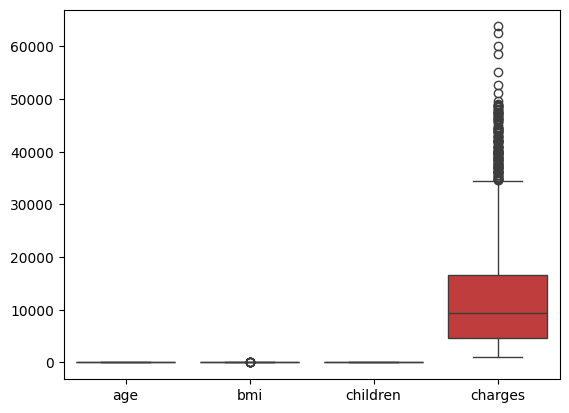

In [ ]:
sns.boxplot(dfins)

In [ ]:
dfins["bmi"]

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880
...,...
1333,30.970
1334,31.920
1335,36.850
1336,25.800


<Axes: ylabel='bmi'>

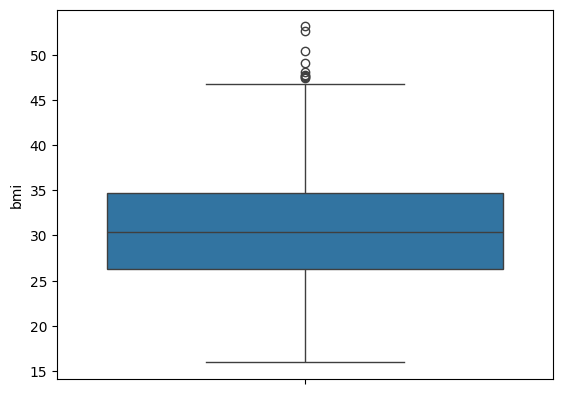

In [ ]:
sns.boxplot(dfins["bmi"])

<Axes: ylabel='charges'>

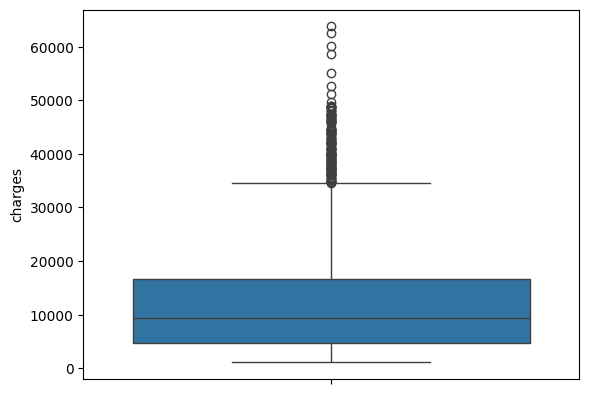

In [ ]:
sns.boxplot(dfins["charges"])

In [ ]:
dfins["sex"]

,sex
0,female
1,male
2,male
3,male
4,male
...,...
1333,male
1334,female
1335,female
1336,female


In [ ]:
dfins["sex"].unique()

array(['female', 'male'], dtype=object)

In [ ]:
dfins["sex"].nunique()

2

In [ ]:
dfins["sex"].value_counts()

,count
sex,
male,676
female,662


In [ ]:
dfins["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
dfins["smoker"].nunique()

2

In [ ]:
dfins["smoker"].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
dfins["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
dfins["region"].nunique()

4

In [ ]:
dfins["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Axes: ylabel='bmi'>

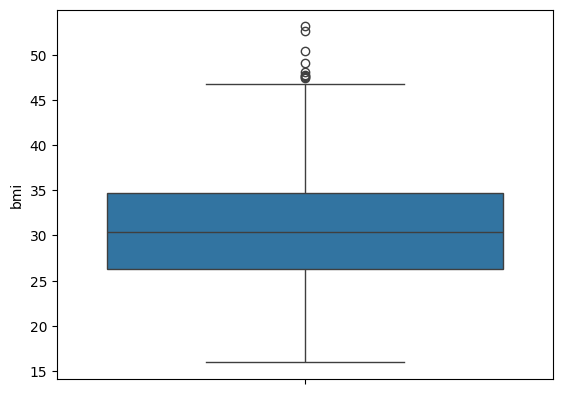

In [ ]:
sns.boxplot(dfins["bmi"])

In [ ]:
q1=dfins["bmi"].quantile(0.25)

In [ ]:
q1

np.float64(26.29625)

In [ ]:
q3=dfins["bmi"].quantile(0.75)

In [ ]:
q3

np.float64(34.69375)

In [ ]:
iqr=q3-q1

In [ ]:
iqr

np.float64(8.3975)

In [ ]:
lower=q1-(1.5*iqr)

In [ ]:
lower

np.float64(13.7)

In [ ]:
upper=q3+(1.5*iqr)

In [ ]:
upper

np.float64(47.290000000000006)

In [ ]:
dfins["bmi"]<lower

,bmi
0,False
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


In [ ]:
dfins[dfins["bmi"]<lower]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
dfins["bmi"]>upper

,bmi
0,False
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


In [ ]:
dfins[dfins["bmi"]>upper]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [ ]:
dfins[(dfins["bmi"]<lower) |  (dfins["bmi"]>upper)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [ ]:
dfins["bmi"]=dfins["bmi"].map(lambda x: lower if x< lower else upper if x>upper else x)

<Axes: ylabel='bmi'>

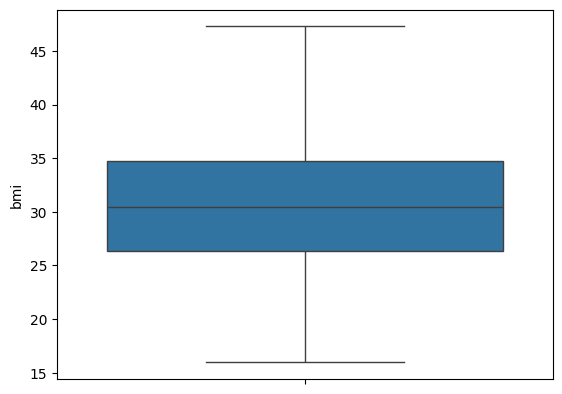

In [ ]:
sns.boxplot(dfins["bmi"])

error detection in charges column

In [ ]:
dfins["charges"]

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


<Axes: ylabel='charges'>

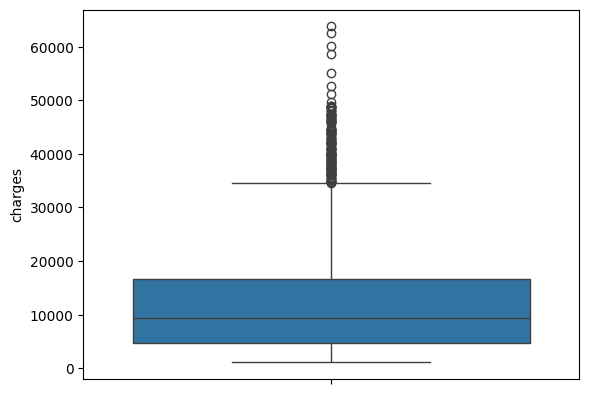

In [ ]:
sns.boxplot(dfins["charges"])

In [ ]:
dfins["charges"]

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
dfins["charges"].describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [ ]:
q11=dfins["charges"].quantile(0.25)

In [ ]:
q11

np.float64(4740.28715)

In [ ]:
q33=dfins["charges"].quantile(0.75)

In [ ]:
q33

np.float64(16639.912515)

In [ ]:
iqr1=q33-q11

In [ ]:
iqr1

np.float64(11899.625365)

In [ ]:
lowerlimit=q11-(1.5*iqr1)

In [ ]:
upperlimit=q33+(1.5*iqr1)

In [ ]:
upperlimit

np.float64(34489.350562499996)

In [ ]:
dfins["charges"]<lowerlimit

,charges
0,False
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


In [ ]:
dfins["charges"]>upperlimit

,charges
0,False
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


In [ ]:
dfins[dfins["charges"]<lowerlimit]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
dfins[dfins["charges"]>upperlimit]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [ ]:
dfins[(dfins["charges"]<lowerlimit)  | (dfins["charges"]>upperlimit)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [ ]:
dfins["charges"].map(lambda x: lowerlimit if x<lowerlimit else upperlimit if x>upperlimit else x)

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
dfins["charges"]=dfins["charges"].map(lambda x: lowerlimit if x<lowerlimit else upperlimit if x>upperlimit else x)

<Axes: ylabel='charges'>

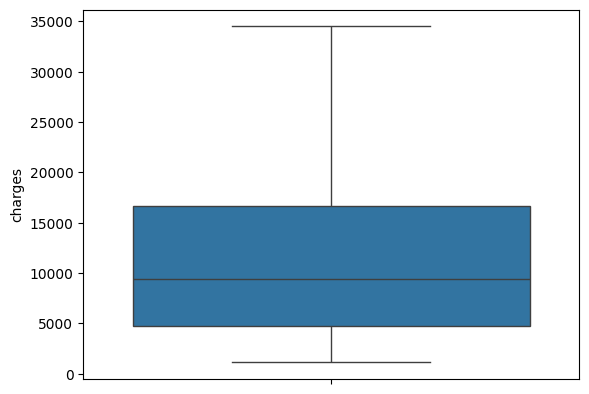

In [ ]:
sns.boxplot(dfins["charges"])

In [ ]:
dfins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dfins.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe=OneHotEncoder(drop="first")

In [ ]:
ohe

OneHotEncoder(drop='first')

In [ ]:
dfins["region"]

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [ ]:
dfins[["region"]]

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [ ]:
ohe.fit(dfins[["region"]])

OneHotEncoder(drop='first')

In [ ]:
ohe.transform(dfins[["region"]])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1014 stored elements and shape (1338, 3)>

Many encoders like OneHotEncoder return data in a sparse matrix form.

But is NOT easily visible/readable

.toarray() makes it human-readable

In [ ]:
ohe.transform(dfins[["region"]]).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
ary=ohe.transform(dfins[["region"]]).toarray()

In [ ]:
ary

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
ohe.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
ary

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
dfins["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
pd.DataFrame(ary,dtype='int',columns=['region_northwest', 'region_southeast', 'region_southwest'])

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [ ]:
dfreg=pd.DataFrame(ary,dtype='int',columns=['region_northwest', 'region_southeast', 'region_southwest'])

In [ ]:
dfreg

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [ ]:
dfins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In ML preprocessing, axis=1 is used when adding new columns.


axis = 0	Work row-wise (up/down)
axis = 1	Work column-wise (left/right)

In [ ]:
pd.concat([dfins,dfreg],axis=1)

,age,sex,bmi,children,smoker,region,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1


In [ ]:
dfins=pd.concat([dfins,dfreg],axis=1)

In [ ]:
dfins

,age,sex,bmi,children,smoker,region,charges,region_northwest,region_southeast,region_southwest,region_northwest,region_southeast,region_southwest
0,19.0,female,27.900,0.0,yes,southwest,16884.92400,NaN,NaN,NaN,0,0,1
1,18.0,male,33.770,1.0,no,southeast,1725.55230,NaN,NaN,NaN,0,1,0
2,28.0,male,33.000,3.0,no,southeast,4449.46200,NaN,NaN,NaN,0,1,0
3,33.0,male,22.705,0.0,no,northwest,21984.47061,NaN,NaN,NaN,1,0,0
4,32.0,male,28.880,0.0,no,northwest,3866.85520,NaN,NaN,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1,0,0
1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0
1335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0,1,0
1336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0,0,1


In [ ]:
dfins.drop("region", axis = 1, inplace = True)

In [ ]:
dfins

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,region_northwest,region_southeast,region_southwest
0,19.0,female,27.900,0.0,yes,16884.92400,NaN,NaN,NaN,0,0,1
1,18.0,male,33.770,1.0,no,1725.55230,NaN,NaN,NaN,0,1,0
2,28.0,male,33.000,3.0,no,4449.46200,NaN,NaN,NaN,0,1,0
3,33.0,male,22.705,0.0,no,21984.47061,NaN,NaN,NaN,1,0,0
4,32.0,male,28.880,0.0,no,3866.85520,NaN,NaN,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1,0,0
1334,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0
1335,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0,1,0
1336,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0,0,1


In [ ]:
pd.get_dummies(dfins )

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19.0,27.900,0.0,16884.92400,NaN,NaN,NaN,0,0,1,True,False,False,True
1,18.0,33.770,1.0,1725.55230,NaN,NaN,NaN,0,1,0,False,True,True,False
2,28.0,33.000,3.0,4449.46200,NaN,NaN,NaN,0,1,0,False,True,True,False
3,33.0,22.705,0.0,21984.47061,NaN,NaN,NaN,1,0,0,False,True,True,False
4,32.0,28.880,0.0,3866.85520,NaN,NaN,NaN,1,0,0,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1,0,0,False,False,False,False
1334,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0,False,False,False,False
1335,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0,1,0,False,False,False,False
1336,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0,0,1,False,False,False,False


drop_first=True removes one column

In [ ]:
pd.get_dummies(dfins, drop_first= True )

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19.0,27.900,0.0,16884.92400,NaN,NaN,NaN,0,0,1,False,True
1,18.0,33.770,1.0,1725.55230,NaN,NaN,NaN,0,1,0,True,False
2,28.0,33.000,3.0,4449.46200,NaN,NaN,NaN,0,1,0,True,False
3,33.0,22.705,0.0,21984.47061,NaN,NaN,NaN,1,0,0,True,False
4,32.0,28.880,0.0,3866.85520,NaN,NaN,NaN,1,0,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1,0,0,False,False
1334,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0,False,False
1335,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0,1,0,False,False
1336,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0,0,1,False,False


In [ ]:
pd.get_dummies(dfins, drop_first= True ).replace([True, False], [1,0])

/tmp/ipython-input-1311615215.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd.get_dummies(dfins, drop_first= True ).replace([True, False], [1,0])


,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19.0,27.900,0.0,16884.92400,NaN,NaN,NaN,0,0,1,0,1
1,18.0,33.770,1.0,1725.55230,NaN,NaN,NaN,0,1,0,1,0
2,28.0,33.000,3.0,4449.46200,NaN,NaN,NaN,0,1,0,1,0
3,33.0,22.705,0.0,21984.47061,NaN,NaN,NaN,1,0,0,1,0
4,32.0,28.880,0.0,3866.85520,NaN,NaN,NaN,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1,0,0,0,0
1334,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0,0,0
1335,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0,1,0,0,0
1336,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0,0,1,0,0
